# MASCHINELLES LERNEN MIT EMPIRISCHEN DATEN

## Hands-On | Data Exploration & Preprocessing


## Vorbereitung

* Laden Sie den Titanic-Datensaz aus dem Moodle-Kurs herunter.
* Finden Sie heraus, woher der Titanic-Datensatz stammt. Wer hat ihn wie erhoben? Wozu?
* Gehen Sie die Fragen im Online-Hands-On der Reihe nach durch.
* Beantworten Sie die Fragen, indem Sie die unten vorgesehenen Felder mit Text und Code ergänzen.

## Literatur

* S. Raschka & V. Mirjalili (2018) Datenvorverarbeitung. In: S. Raschka & V. Mirjalili. Machine Learning with Python and Scikit-earn and TensorFlow. S. 125-158 (Kapitel 4)
* A. Famili et al (1997) Data Preprocessing and Intelligent Data Analysis. In: Intelligent Data Analysis Journal

## Aufgabe 1 | Einblick in den Datensatz

### 1.1 

Welches Format weist der Datensatz auf? Wie kann er eingelesen werden?

In [78]:
import pandas as pd
import numpy as np

train = pd.read_csv("./Titanic/train.csv")
test = pd.read_csv("./Titanic/test.csv")

Der Datensatz ist im .csv Format

### 1.2

Verschaffen Sie sich einen Überblick über den Datensatz, inndem Sie sich die ersten 5 Einträge ausgeben lassen.

In [79]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### 1.3

Müssen Konvertierungen vorgenommen werden? Falls ja, geben Sie an welche.

In [80]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [83]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

Ja, denn einige Felder sind Strings.

## Aufgabe 2 | Merkmale des Datensatzes

### 2.1

Verschaffen Sie sich einen Überblick über die Größe des Datensatzes. Wie viele Samples enthält er?

In [84]:
print(train.shape[0] + test.shape[0])

1309


Der Datensatz enthält 1309 Samples.

### 2.2

Betrachten Sie die Features aus Ihren Datensatz!
Wie viele Features enthält ein Sample?

In [85]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


12 Features im training, 11 Features im Test.

## Aufgabe 3 | Feature Analyse

### 3.1

Verschaffen Sie sich einen Überblick über die Skalen der Features. Welche Skala besitzt das Feature Sex?

In [86]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

Nominalskala bei Geschlecht (String)

Ordinalskala benötigt

### 3.2

Haben alle numerischen Features die gleiche Einheit? Falls nicht, geben Sie ein Beispiel an für zwei numerische Features mit verschiedener Einheit.

- Nur Alter scheint Nominal zu sein
- Klasse ist Ordinal (Reihenfolge)
- andere sind Kategorial

### 3.3

Sind alle Features normalisiert? Falls nicht, begründen Sie warum nicht.

Nein, viele Daten scheinen nicht numerisch, nicht in ihrer Höhe begrenzt oder besitzen sogar fehlende Werte.

## Aufgabe 4 | Nicht-numerische Features

### 4.1

Wie viele nicht-numerische Features sind vorhanden?

Hier kurze Zusammenfassung bzw. Diskussion der Ergebnisse einfügen.

5 Features:
- Name
- Geschlecht
- Ticket
- Kabine
- Embarked

### 4.2

Überlegen Sie sich, warum nicht-numerische Features Probleme beim Anwenden von Maschinellen Lernen Verfahren verursachen können.
Notieren Sie stichpunktartig Ihre Überlegungen.

- in nicht numerischen Features (Strings) sind haupsächlich kontextuelle Informationen kodiert, die von ML hier nicht ausgewertet werden können
- numerische Werte erwartet

### 4.3

Falls es nicht-numerische Features gibt, wandeln Sie diese in ein ML-geeignetes Form um. Markieren Sie die Methoden die Sie verwendet haben, um die Daten umzuwandeln. Begründen Sie kurz.

In [87]:
pd.get_dummies(train['Sex'])

female  male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
..      ...   ...
886       0     1
887       1     0
888       1     0
889       0     1
890       0     1

[891 rows x 2 columns]

In [88]:
train['Ticket'][:20]

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

- Die Methode get_Dummies() implementiert den One Hot Encoder.
- Schwieriger wird es bei Spalten wie Ticket.

## Aufgabe 5 | Umgang mit fehlenden Werten

### 5.1

Ist der Datensatz vollständig?

In [91]:
#train.describe()
train.isna().sum()
#train['Embarked'].isna()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Nein es gibt Rows ",," also Fehlende Reihen
- auch strukturell
    - Ort/Kabin der Passangers Klasse 3 unbekannt
    - jeder hat passengerID also keine Werte zu Matrosen, Angestellten etc.

### 5.2

Wählen Sie aus, welche der folgenden Features fehlende Werte enthalten.

- Alter
- Kabin
- Embarked

### 5.3

Falls es fehlende Werte gibt: Wie wollen Sie damit umgehen? (In der Datei `train.csv`.)

- Keine Änderung (Es gibt keine fehlenden Werte)
- Löschen ausgewählter Features 
- Löschen ausgewählter Samples
- Löschen ausgewählter Features und Samples
- Naive Imputationsmethode (z.B. letzter Wert, Mittelwert)
- Fortgeschrittene Imputationsmethode (z.B. Regression, Expectation Maximization)

Kombination aus oben genannten.

## Aufgabe 6 | Deskriptive Statistik

### 6.1

Features können mittels deskriptiver Statistik charakterisiert werden. Wählen Sie zunächst alle richtigen Aussagen im folgenden aus:

- Sowohl nominale Features, sowie metrische Features können durch Histogramme visualisert werden.
    - richtig
- Für metrische Features können verschiedene Lagemaße berechnet werden.
    - richtig
- Der Mittelwert ist ein robustes Lagemaß.
- Für nominale Features können verschiedene Lagemaße berechnet werden.
- Der Mittelwert ist ein robustes Streumaß.

### 6.2

Visualieren Sie ein metrisches Feature Ihrer Wahl:

- Scatterplot (Streudiagramm)
- Box-Plot
- Barplot (Säulendiagramm)
- Andere Visualisierung
    - Errorbar (Diagramm mit Fehlerbalken)
    - Histogramm
    - Liniendiagramm
    
Falls Sie eine andere Visualisierung verwendet haben, geben Sie diese an.

<AxesSubplot:>

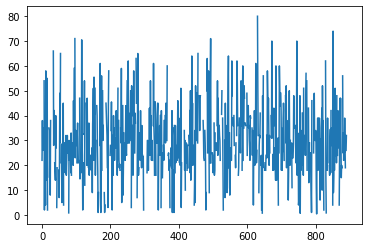

In [70]:
train['Age'].plot()

(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

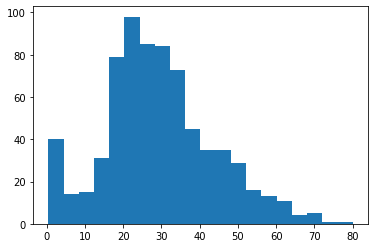

In [72]:
import matplotlib.pyplot as plt
plt.hist(train['Age'].values, bins=20)

{'whiskers': [<matplotlib.lines.Line2D at 0x16c2205e970>,
 'caps': [<matplotlib.lines.Line2D at 0x16c21c030d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16c2205e5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x16c21c037f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16c21c03b80>],
 'means': []}

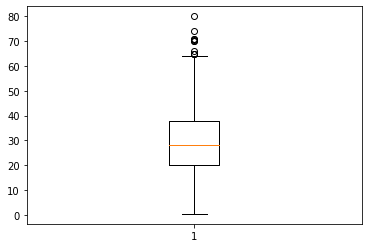

In [73]:
plt.boxplot(train['Age'].dropna())

Hier kurze Zusammenfassung bzw. Diskussion der Ergebnisse einfügen.

### 6.3

Visualieren Sie ein metrisches Feature Ihrer Wahl:

- Box-Plot
- Errorbar (Diagramm mit Fehlerbalken)
- Histogramm
- Liniendiagramm
- Andere Visualisierung

Flls Sie eine andere Visualisierung verwendet haben, geben Sie diese an.

(array([216.,   0., 184.,   0., 491.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. ]),
 <BarContainer object of 5 artists>)

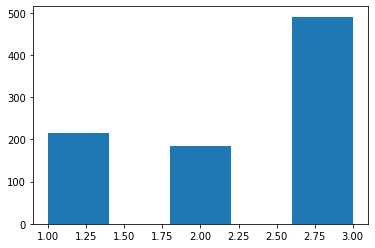

In [97]:
plt.hist(train['Pclass'].values, bins = 5)

Hier kurze Zusammenfassung bzw. Diskussion der Ergebnisse einfügen.

### 6.4

Lassen Sie sich für alle numerischen Features die Mittelwerte ausgeben, was fällt Ihnen auf?

In [102]:
train.mean(numeric_only=True)

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

Mittelwerte scheinen wenig Aussagekraft zu besitzen.

### 6.5

Berechnen Sie die Standardabweichung für das Feature `Age` in der Datei `train.csv`.

In [104]:
train['Age'].std()

14.526497332334042

## Aufgabe 7 | Gesamtbewertung des Datensatzes

### 7.1

Welche Voraussetzungen müssen für Clustering oder Dimensionsreduktion vorhanden sein?

definierter Zielwert/Zielvariable muss vorhanden sein.

Clustering:
- definiertes Ähnlichkeitsmaß

Dimensionsreduktion:
- gleichbleibende Hauptdimensionen

### 7.2

Ist der Datensatz nach Anwendung der von Ihnen vorgenommenen Änderungen geeignet für überwachtes Lernen?

Ja, es gibt Datensatz, von geeigneter Größe
besonders die bereinigten Daten ohne NaN's etc. wird geeignet sein.

### 7.3

Welche Voraussetzungen müssen für eine Klassifizierung oder Regression vorhanden sein?

Man benötigt Differenzierbare Features.

### 7.4

Ist der Datensatz nach Anwendung der von Ihnen vorgenommenen Änderungen geeignet für unüberwachtes Lernen?

Ja, es gibt gute Datengrundlage, auf denen Korrelationen gefunden werden können.